# Exploratory Data Analysis of IPL

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
match_data = pd.read_csv("matches.csv")
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
match_data.shape

(756, 18)

In [4]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
# Dropping umpire3 columns 
match_data.drop(["umpire3"],axis=1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [6]:
match_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


# Best Team

In [10]:
team_winner = match_data["winner"].value_counts().to_frame()
team_winner = team_winner.reset_index()
team_winner.columns=["Team_Name","Matches_Win"]
team_winner

,Team_Name,Matches_Win
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


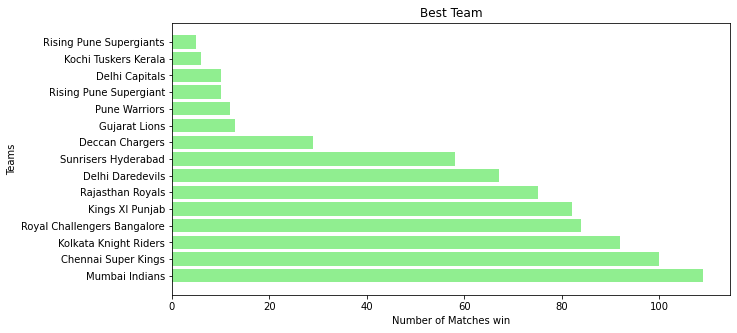

In [25]:
plt.figure(figsize=(10,5))
plt.barh(team_winner.iloc[:,0],team_winner.iloc[:,-1],color="lightgreen")
plt.ylabel("Teams")
plt.xlabel("Number of Matches win")
plt.title("Best Team")
plt.show()

# Best Player

In [32]:
player_winner = match_data["player_of_match"].value_counts().head(25).to_frame()
player_winner = player_winner.reset_index()
player_winner.columns=["Player","Matches_win"]
player_winner

,Player,Matches_win
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


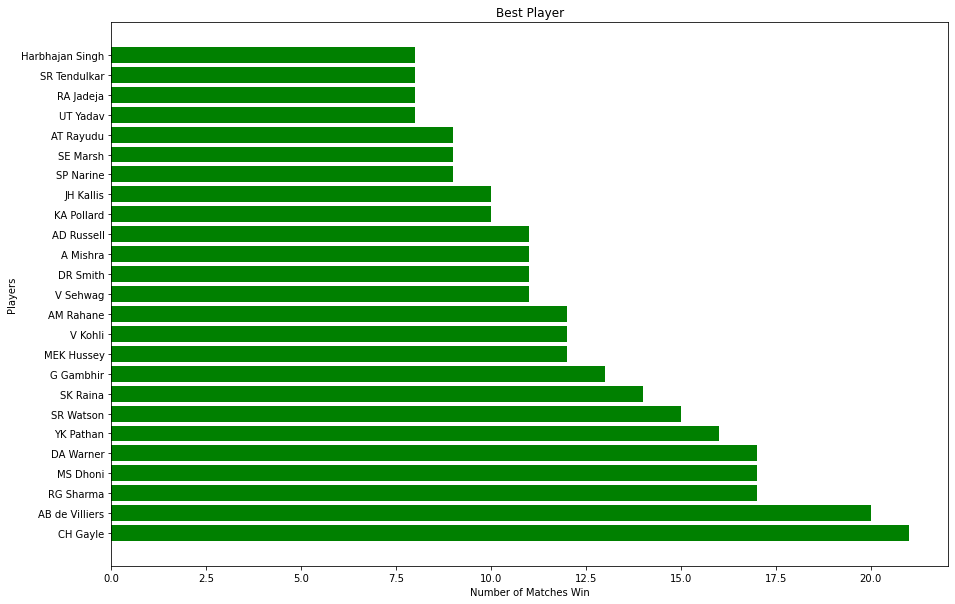

In [37]:
plt.figure(figsize=(15,10))
plt.barh(player_winner.iloc[:,0],player_winner.iloc[:,1],color="green")
plt.xlabel("Number of Matches Win")
plt.ylabel("Players")
plt.title("Best Player")
plt.show()

# City conducting more Matches

In [38]:
city = match_data["city"].value_counts().to_frame()
city = city.reset_index()
city.columns=["City","Matches"]
city

,City,Matches
0,Mumbai,101
1,Kolkata,77
2,Delhi,74
3,Bangalore,66
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


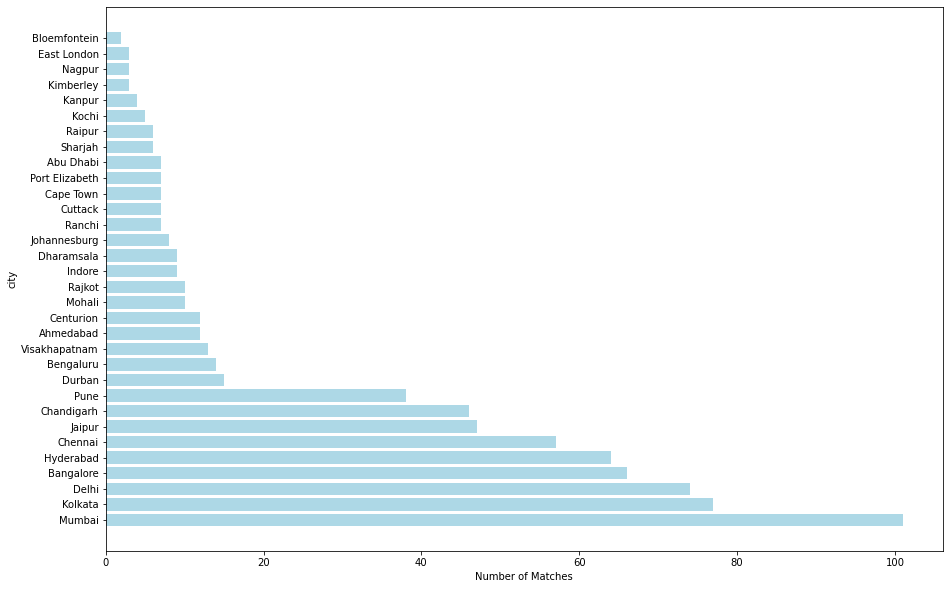

In [46]:
plt.figure(figsize=(15,10))
plt.barh(city["City"],city["Matches"],color = "lightblue")
plt.xlabel("Number of Matches")
plt.ylabel("city")
plt.show()

# Venue where mostly IPL held

In [42]:
Venue = match_data["venue"].value_counts().to_frame()
Venue = Venue.reset_index()
Venue.columns = ["Stadium","Matches"]
Venue

,Stadium,Matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


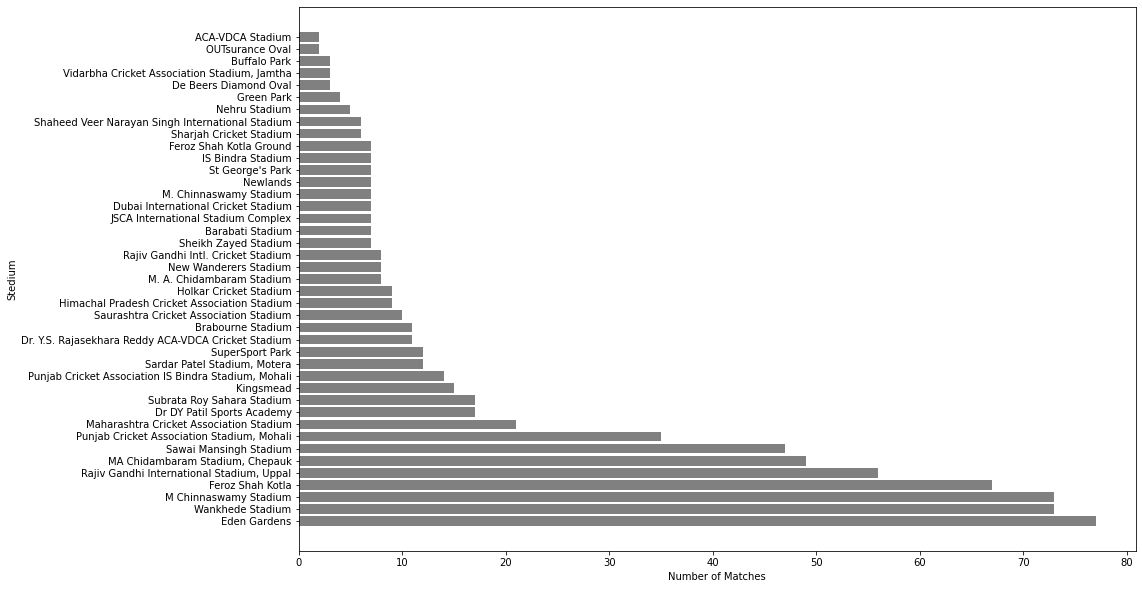

In [45]:
plt.figure(figsize=(15,10))
plt.barh(Venue["Stadium"],Venue["Matches"],color="gray")
plt.xlabel("Number of Matches")
plt.ylabel("Stedium")
plt.show()

# UMPIRE in most of the Matches

In [49]:
ump1 = match_data["umpire1"].value_counts().to_frame()
ump2 = match_data["umpire2"].value_counts().to_frame()


In [64]:
umpire = pd.concat([ump1,ump2],axis=1)
umpire = umpire.sum(axis=1).to_frame()
umpire = umpire.reset_index()
umpire.columns = ["Umpire","Matches"]
umpire.sort_values("Matches",ascending=False).head(10)

,Umpire,Matches
2,S Ravi,106.0
0,HDPK Dharmasena,87.0
12,C Shamshuddin,73.0
3,AK Chaudhary,58.0
56,SJA Taufel,55.0
7,M Erasmus,54.0
1,Asad Rauf,51.0
6,BR Doctrove,42.0
9,Nitin Menon,42.0
38,CK Nandan,41.0


# Is winning a TOSS is more likely to win a Match

In [66]:
count=0
for index ,value in match_data.iterrows():
    if (value["toss_winner"]==value["winner"]):
        count+=1
        
    prob = count/len(match_data) 
print("Probability of wining the match if a team winns a tos:{:.2f}".format(prob))

Probability of wining the match if a team winns a tos:0.52


In [ ]:
# Win BY Run

In [69]:
run  = match_data["win_by_runs"].value_counts().to_frame()
run  = run.reset_index()
run.columns = ["Run","Count"]
run

,Run,Count
0,0,419
1,14,13
2,4,11
3,10,11
4,1,10
...,...,...
84,66,1
85,64,1
86,59,1
87,62,1


In [76]:
run.drop(0,inplace=True)

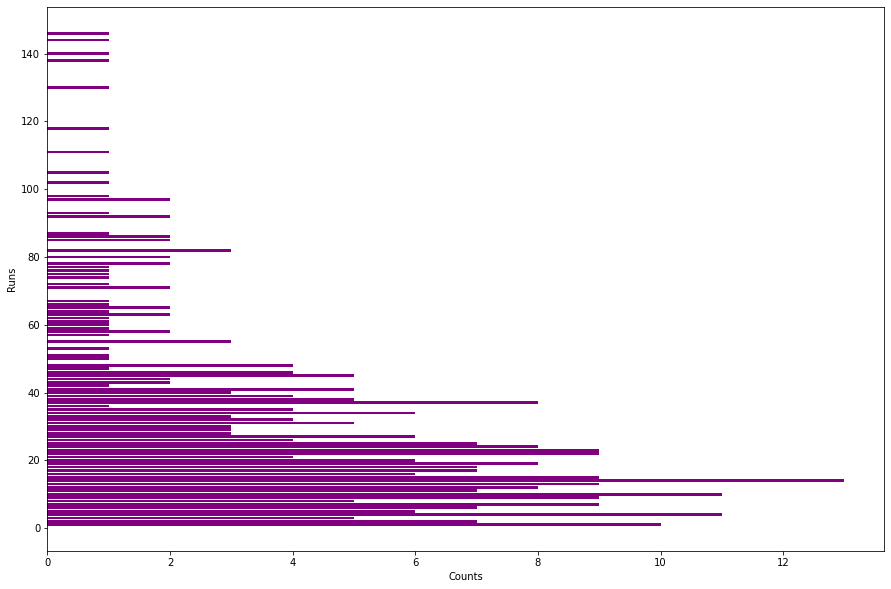

In [77]:
plt.figure(figsize=(15,10))
plt.barh(run["Run"],run["Count"],color="purple")
plt.xlabel("Counts")
plt.ylabel("Runs")
plt.show()

# Win BY Wickets

In [71]:
wickets = match_data["win_by_wickets"].value_counts().to_frame()
wickets = wickets.reset_index()
wickets.columns = ["Wickets","Count"]
wickets

,Wickets,Count
0,0,350
1,6,85
2,7,80
3,5,71
4,8,54
5,4,41
6,9,37
7,3,18
8,10,11
9,2,6


In [78]:
wickets.drop(0,inplace=True)

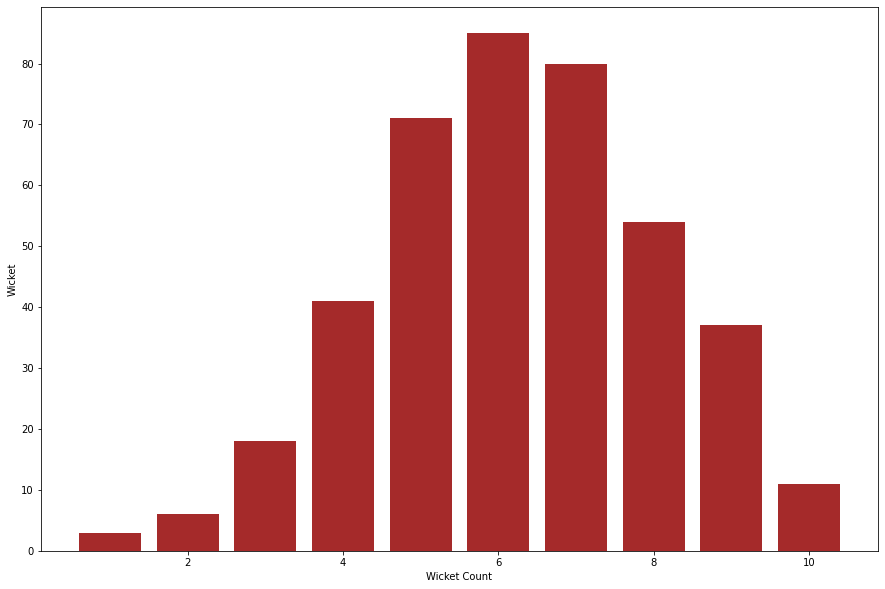

In [81]:
plt.figure(figsize=(15,10))
plt.bar(wickets["Wickets"],wickets["Count"],color="brown")
plt.xlabel("Wicket Count")
plt.ylabel("Wicket")
plt.show()